```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter

#ignoring warning for now
import warnings
warnings.filterwarnings("ignore")
```

In [ ]:
#run the code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
We will be using the Wisconsim Breast Cancer Dataset

## About the dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species


```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
data
```

In [ ]:
#run the code here

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

When we call `data` what is the type of output?

**Array**

```python
# we have convert this into a dataframe so we could better investigate through the dataset
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()
```

In [ ]:
#run the code here

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Notice that there is no target column? We'll have to call it separately.

```python
df['target'] = pd.Series(data.target)
df.head()

#describe the columns of the dataset
df.info()
```

In [ ]:
#run the code here

df['target'] = pd.Series(data.target)
df.head()

# Describe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


```python
# Create pair plot with custom settings
sns.pairplot(data=df, hue="target", diag_kind="kde", palette="tab10")
#read on what the diag_kind hyperparameter does

# Show plot
plt.show()
```

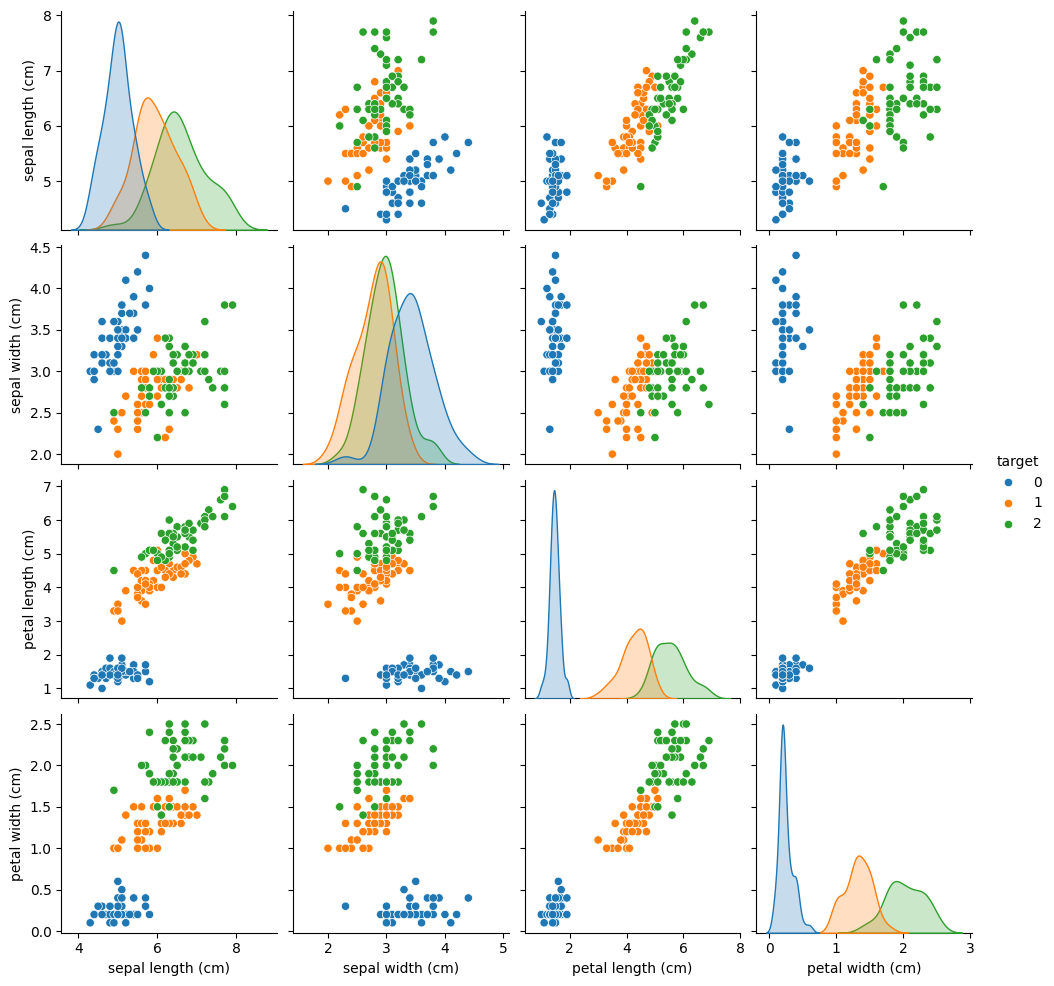

In [ ]:
#run the code here

# Create pair plot with custom settings
sns.pairplot(data=df, hue="target", diag_kind="kde", palette="tab10")

# Show plot
plt.show()

**Question 1**

What hypotheses can you draw from this? Enumerate three below:

1)
2)
3)

## Splitting the dataset
We will also be splitting the dataset into train and test sets.

```python
#get the x value: all columns except the y value
#get the y value: this is the 'target' column which indicates the species of the row of data
X, y = load_iris(return_X_y=True)

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

```

In [ ]:
#run the code here

# Get the x value & y value
X, y = load_iris(return_X_y=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

**Question 2**

What does the `test_size` and `random_state` do? Explain thoroughly

**Question 3**

Notice that we do not have to call a validation set?
Read through the documentations of `sklearn` and explain this

```python
#Let us see the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

for key in Counter(y_train).keys():#/len(y_train)
    print(f"{key}, Raw Count:{Counter(y_train)[key]}, Normalized:{Counter(y_train)[key]/len(y_train)}")
```

In [ ]:
#run the code here

# Print proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

for key in Counter(y_train).keys():#/len(y_train)
    print(f"{key}, Raw Count:{Counter(y_train)[key]}, Normalized:{Counter(y_train)[key]/len(y_train)}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)
0, Raw Count:40, Normalized:0.3333333333333333
1, Raw Count:41, Normalized:0.3416666666666667
2, Raw Count:39, Normalized:0.325


## Imbalanced dataset
**Question 4**

What are the risks of running a training set with imbalanced values?

```python
# we will do a 2nd set of split to see the difference in model performance
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

#Let us see the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train2.shape}, Output: {y_train2.shape}")
print(f"Test Set Size | Input: {X_test2.shape}, Output: {y_test2.shape}")

for key in Counter(y_train2).keys():#/len(y_train)
    print(f"{key}, Raw Count:{Counter(y_train2)[key]}, Normalized:{Counter(y_train2)[key]/len(y_train2)}")
```

In [ ]:
#run the code here

# Do 2nd set of split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)

# See the proportions of the train-test sets
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train2.shape}, Output: {y_train2.shape}")
print(f"Test Set Size | Input: {X_test2.shape}, Output: {y_test2.shape}")

for key in Counter(y_train2).keys():#/len(y_train)
    print(f"{key}, Raw Count:{Counter(y_train2)[key]}, Normalized:{Counter(y_train2)[key]/len(y_train2)}")

Original Size | Input: (150, 4), Output: (150,)
Train Set Size | Input: (120, 4), Output: (120,)
Test Set Size | Input: (30, 4), Output: (30,)
0, Raw Count:40, Normalized:0.3333333333333333
2, Raw Count:40, Normalized:0.3333333333333333
1, Raw Count:40, Normalized:0.3333333333333333


## Visualize the data

```python
#first set of train-test split
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test['target'] = df_test['target'].astype(int)

#second set of train-test split
train2_set = np.concatenate((X_train2, y_train2.reshape(-1,1)), axis=1)
df_train2 = pd.DataFrame(train2_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train2['target'] = df_train2['target'].astype(int)

test2_set = np.concatenate((X_test2, y_test2.reshape(-1,1)), axis=1)
df_test2 = pd.DataFrame(test2_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test2['target'] = df_test2['target'].astype(int)
```

In [ ]:
#run the code here

# First set of train-test split
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
df_train = pd.DataFrame(train_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train['target'] = df_train['target'].astype(int)

test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
df_test = pd.DataFrame(test_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test['target'] = df_test['target'].astype(int)

# Second set of train-test split
train2_set = np.concatenate((X_train2, y_train2.reshape(-1,1)), axis=1)
df_train2 = pd.DataFrame(train2_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_train2['target'] = df_train2['target'].astype(int)

test2_set = np.concatenate((X_test2, y_test2.reshape(-1,1)), axis=1)
df_test2 = pd.DataFrame(test2_set, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df_test2['target'] = df_test2['target'].astype(int)

```python
#let's visualize the data

fig, ax =plt.subplots(1,2,figsize=(20, 5))

#plot the first set of training data and their corresponding test subset
sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width',
                hue='target', style='target', palette="Set2", ax=ax[0])

sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width',
                color='black', label='unlabeled', ax=ax[0])

ax[0].set_title('SET 1: Train + Test Set Data Points')

#second set of train2-test2 split
sns.scatterplot(data=df_train2, x='sepal_length', y='sepal_width',
                hue='target', style='target', palette="Set2", ax=ax[1])

sns.scatterplot(data=df_test2, x='sepal_length', y='sepal_width',
                color='black', label='unlabeled', ax=ax[1])

ax[1].set_title('SET 2: Train + Test Set Data Points')

#call the figure
fig.show()
```

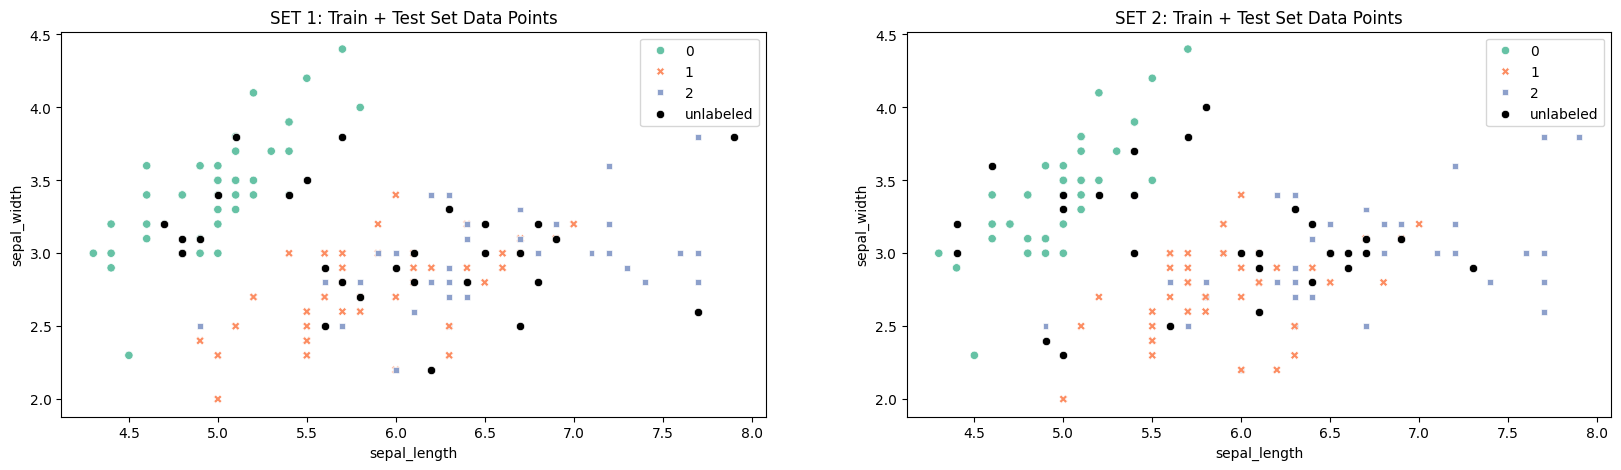

In [ ]:
#run the code here

# Visualize the data
fig, ax =plt.subplots(1,2,figsize=(20, 5))

# Plot the first set of training data and their corresponding test subset
sns.scatterplot(data=df_train, x='sepal_length', y='sepal_width',
                hue='target', style='target', palette="Set2", ax=ax[0])

sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width',
                color='black', label='unlabeled', ax=ax[0])

ax[0].set_title('SET 1: Train + Test Set Data Points')

# Second set of train2-test2 split
sns.scatterplot(data=df_train2, x='sepal_length', y='sepal_width',
                hue='target', style='target', palette="Set2", ax=ax[1])

sns.scatterplot(data=df_test2, x='sepal_length', y='sepal_width',
                color='black', label='unlabeled', ax=ax[1])

ax[1].set_title('SET 2: Train + Test Set Data Points')

# Call the figure
fig.show()

## Implementing KNN Classifier
In the next section we will be implementing the KNN Algorithm and classify the type of iris plant. To do this we need to correctly implement the following code block.

```
def classify(X, y, point, k):
    '''
        Returns the classification of a new data point
        
        Parameters
            X: training features
            y: training labels/target
            point: test data point to be classified by the model
            k: number of neighbors to look into to classify the data
    '''
    indices = get_nearest_neighbors(X, point, k=3)
    labels = y[indices]
    label = Counter(labels).most_common(1)[0][0]
    return label
```

Reference for pseudocode of KNN Algorithm:

1. Load the data
2. Initialize K (# of neighbors to consider)
3. For each training datapoint:
     - Calculate distance between training data and test data
     - Add distance and index of test data to an ordered collection
4. Sort ordered collection from smallest to largest based on distance
5. Pick first K entries from sorted collection
6. Get labels of selected entries and get label majority

If you are reading this well, the submission requirements for the in-class questions and activities is as follows:
- Submit your answers in PDF format. Bin is to open by Wednesday
- This is an individual task

## Exercise: Implement Distance Measurement

 - Implement Minkowski distance.
 - Replace ```raise NotImplementedError``` with your code.


For reference, here are the formulas for some distance measurements:

 - Manhattan Distance
$$Dist(\bar{X}, \bar{Y}) = \sum_i |x_i - y_i|$$

 - Euclidean Distance
$$Dist(\bar{X}, \bar{Y}) = \sqrt{\sum_i (x_i - y_i)^2}$$

 - Minkowski Distance
$$Dist(\bar{X}, \bar{Y}) = ({\sum_i |x_i - y_i|^p})^{1/p}$$


```python
def minkowski(X, point, p:int=2) -> list:
    '''
    Returns a list of distances of each elements in X from the reference point.

    Parameters:
    X: training features whose data type is numpy array
    point: single data point part of the test data
    p: type of distance measure 2 for euclidean and 1 for manhattan
    '''
    d = lambda x: (((abs(x-point))**p).sum())**(1/p)
    distances = list(map(d, X))
    return distances
```

In [ ]:
#run the code here

def minkowski(X, point, p:int=2) -> list:
    '''
    Returns a list of distances of each elements in X from the reference point.

    Parameters:
    X: training features whose data type is numpy array
    point: single data point part of the test data
    p: type of distance measure 2 for euclidean and 1 for manhattan
    '''
    d = lambda x: (((abs(x-point))**p).sum())**(1/p)
    distances = list(map(d, X))
    return distances

```python
distances = minkowski(X_train, y_train[0],2)
distances
```

In [ ]:
#run the code here

distances = minkowski(X_train, y_train[0],2)
distances

[5.929586832149437,
 7.366138744281159,
 8.707468059085832,
 6.099180272790762,
 5.597320787662612,
 8.634234187233979,
 8.584870412533903,
 6.448255578061404,
 6.321392251711643,
 6.790434448545984,
 8.399404740813482,
 8.38868285251028,
 8.879189152169246,
 6.798529252713413,
 6.718630812896331,
 7.12039324756716,
 8.705745229444748,
 9.168424073961676,
 8.59534757877772,
 10.404806581575652,
 7.7607989279454985,
 10.711209082078456,
 7.928429857165919,
 6.345076831686122,
 10.771258050942796,
 7.664202502543888,
 6.371812928829597,
 6.24739945897491,
 6.649812027418519,
 6.5,
 8.615683373940804,
 6.18465843842649,
 6.04979338490167,
 6.32771680782255,
 7.614459928320589,
 6.313477647065838,
 7.782673062643709,
 11.11125555461668,
 5.779273310719955,
 8.187185108448446,
 8.230431337420901,
 7.063285354564121,
 8.442748367682173,
 8.399404740813482,
 7.605261336732617,
 7.788452991448302,
 9.189668111526117,
 7.295889253545451,
 6.8862181202747275,
 6.494613152451807,
 8.9414763881587

```python
#let's check if the function is working
from numpy.testing import assert_almost_equal

point = X_test[0]
distances = minkowski(X_train, point)
assert_almost_equal(distances[:20], [4.192851058647326, 3.6878177829171555, 0.7615773105863913, 3.558089374931439, 3.950949253027682,
                                     0.8426149773176357, 0.6164414002968983, 3.5411862419251547, 3.706750598570128, 3.7349698793966195,
                                     0.8660254037844383, 0.7549834435270751, 0.734846922834954, 3.72827037646145, 3.5411862419251547,
                                     1.2489995996796794, 0.5385164807134502, 1.0862780491200217, 0.648074069840786, 2.345207879911715])
```

In [ ]:
#run the code here

# Check if the function is working
from numpy.testing import assert_almost_equal

point = X_test[0]
distances = minkowski(X_train, point)
assert_almost_equal(distances[:20], [4.192851058647326, 3.6878177829171555, 0.7615773105863913, 3.558089374931439, 3.950949253027682,
                                     0.8426149773176357, 0.6164414002968983, 3.5411862419251547, 3.706750598570128, 3.7349698793966195,
                                     0.8660254037844383, 0.7549834435270751, 0.734846922834954, 3.72827037646145, 3.5411862419251547,
                                     1.2489995996796794, 0.5385164807134502, 1.0862780491200217, 0.648074069840786, 2.345207879911715])

**Question 5 (5 pts)**

Explain line by line and each element used in building the `minowski` function.

## Exercise: Get Nearest Neighbors

```python
distances = minkowski(X_train, point)
k = 5

#get the distances
print(np.sort(distances))

#sort the distances
print(np.argsort(distances))

#get the top k data points
print(np.argsort(distances)[:k])
```

In [ ]:
#run the code here

distances = minkowski(X_train, point)
k = 5

# Get the distances
print(np.sort(distances))

# Sort the distances
print(np.argsort(distances))

# Get the top k data points
print(np.argsort(distances)[:k])

[0.2236068  0.3        0.43588989 0.50990195 0.50990195 0.51961524
 0.52915026 0.53851648 0.58309519 0.6164414  0.6164414  0.6244998
 0.64807407 0.64807407 0.64807407 0.64807407 0.65574385 0.67082039
 0.67082039 0.7        0.70710678 0.70710678 0.72111026 0.72801099
 0.73484692 0.74161985 0.75498344 0.75498344 0.76157731 0.77459667
 0.78740079 0.81240384 0.81240384 0.84261498 0.86023253 0.8660254
 0.8660254  0.92736185 0.94339811 0.9486833  0.96436508 0.97467943
 0.97467943 0.98994949 1.00498756 1.04403065 1.05356538 1.08627805
 1.09544512 1.1045361  1.15758369 1.22474487 1.2489996  1.29614814
 1.3        1.34907376 1.34907376 1.40712473 1.42478068 1.43874946
 1.55563492 1.61864141 1.62788206 1.64316767 1.73493516 1.81383571
 1.81659021 1.82482876 1.8493242  1.86010752 1.8973666  1.91572441
 1.99749844 2.03469899 2.0904545  2.34520788 2.40208243 2.59036677
 2.68328157 2.92574777 3.23728281 3.27719392 3.29393382 3.3
 3.36749165 3.41613817 3.44383507 3.54118624 3.54118624 3.54964787
 3.5

```python
def get_nearest_neighbors(X, point, k:int) -> list:
    '''
    Returns list of  indices of nearest neighbors

    X: training features whose data type is numpy array
    point: single data point part of the test data
    k: number of neighbors to look into to classify the data
    return a sorted list of indexes
    '''
    distances = minkowski(X, point)
    indices = np.argsort(distances)[:k].tolist()
    return indices
```

In [ ]:
#run the code here

def get_nearest_neighbors(X, point, k:int) -> list:
    '''
    Returns list of  indices of nearest neighbors

    X: training features whose data type is numpy array
    point: single data point part of the test data
    k: number of neighbors to look into to classify the data
    return a sorted list of indexes
    '''
    distances = minkowski(X, point)
    indices = np.argsort(distances)[:k].tolist()
    return indices

```python
point = X_test[0]
indices = get_nearest_neighbors(X, point, k=3)
indices
```

In [ ]:
#run the code here

point = X_test[0]
indices = get_nearest_neighbors(X, point, k=3)
indices

[73, 63, 91]

```python
assert indices == [73, 63, 91]
```

In [ ]:
#run the code here

assert indices == [73, 63, 91]

## Exercise: Classify!

```python
indices = get_nearest_neighbors(X, point, k=3)
print(indices)
labels = y[indices]
print(labels)
#hint use the Counter library to get the most common label
label = Counter(labels).most_common()[0][0]
print(label)
```

In [ ]:
#run the code here

indices = get_nearest_neighbors(X, point, k=3)
print(indices)
labels = y[indices]
print(labels)

label = Counter(labels).most_common()[0][0]
print(label)

[73, 63, 91]
[1 1 1]
1


```python
from collections import Counter

def classify(X, y, point, k:int):
    '''
    Returns the classification of a new data point
    '''
    indices = get_nearest_neighbors(X, point, k=3)
    labels = y[indices]
    #hint use the Counter library to get the most common label
    label = Counter(labels).most_common()[0][0]
    return label
```

In [ ]:
#run the code here

from collections import Counter

def classify(X, y, point, k:int):
    '''
    Returns the classification of a new data point
    '''
    indices = get_nearest_neighbors(X, point, k=3)
    labels = y[indices]

    label = Counter(labels).most_common()[0][0]
    return label

```python
# familiarize yourself with this assert function
# because this would be used subsequently in your execises to check for your results

assert classify(X_train, y_train, point, k=3) == 1
```

In [ ]:
#run the code here

assert classify(X_train, y_train, point, k=3) == 1

## Test if our predictions match the actual...

```python
def calculate_accurcay(y_pred, y_test):
    '''
    Calculates the accuracy of the model
    
    y_pred: Model prediction
    y_test: Actual labels
    '''
    
    return sum(y_pred == y_test)/len(y_test)
```

In [ ]:
#run the code here

def calculate_accurcay(y_pred, y_test):
    '''
    Calculates the accuracy of the model

    y_pred: Model prediction
    y_test: Actual labels
    '''

    return sum(y_pred == y_test)/len(y_test)

```python
# First set of data split
y_pred = [classify(X_train, y_train, p, k=2) for p in X_test]
print(f"1st Score: {calculate_accurcay(y_pred, y_test):.2%}")

#second set of data split
y_pred2 = [classify(X_train2, y_train2, p, k=2) for p in X_test2]
print(f"2nd Score: {calculate_accurcay(y_pred2, y_test2):.2%}")
```

In [ ]:
#run the code here

# First set of data split
y_pred = [classify(X_train, y_train, p, k=2) for p in X_test]
print(f"1st Score: {calculate_accurcay(y_pred, y_test):.2%}")

# Second set of data split
y_pred2 = [classify(X_train2, y_train2, p, k=2) for p in X_test2]
print(f"2nd Score: {calculate_accurcay(y_pred2, y_test2):.2%}")

1st Score: 100.00%
2nd Score: 100.00%


```python
#first set of train-test split
df_train = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_train['target'] = y_train

df_test = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_test['target'] = y_test

df_pred = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_pred['target'] = y_pred

#second set of train-test split
df_train2 = pd.DataFrame(X_train2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_train2['target'] = y_train2

df_test2 = pd.DataFrame(X_test2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_test2['target'] = y_test2

df_pred2 = pd.DataFrame(X_test2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_pred2['target'] = y_pred2

```

In [ ]:
#run the code here

# First set of train-test split
df_train = pd.DataFrame(X_train, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_train['target'] = y_train

df_test = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_test['target'] = y_test

df_pred = pd.DataFrame(X_test, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_pred['target'] = y_pred

# Second set of train-test split
df_train2 = pd.DataFrame(X_train2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_train2['target'] = y_train2

df_test2 = pd.DataFrame(X_test2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_test2['target'] = y_test2

df_pred2 = pd.DataFrame(X_test2, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_pred2['target'] = y_pred2

```python
#let's visualize the data

fig, ax =plt.subplots(2,1,figsize=(10, 7),dpi=300)

#plot the first set of training data and their corresponding test subset
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width',
                hue='target',palette="Set2", ax=ax[0])

sns.scatterplot(data=df_pred, x='sepal_length', y='sepal_width',
                hue='target', marker='x', palette="Set2", ax=ax[0])

ax[0].set_title('SET 1: Pred vs Test Set Data Points')

#plot the second set of training data and their corresponding test subset
sns.scatterplot(data=df_test2, x='sepal_length', y='sepal_width',
                hue='target',palette="Set2", ax=ax[1])

sns.scatterplot(data=df_pred2, x='sepal_length', y='sepal_width',
                hue='target', marker='x', palette="Set2", ax=ax[1])

ax[1].set_title('SET 2: Pred vs Test Set Data Points')

#call the figure
fig.tight_layout()
fig.show()
```

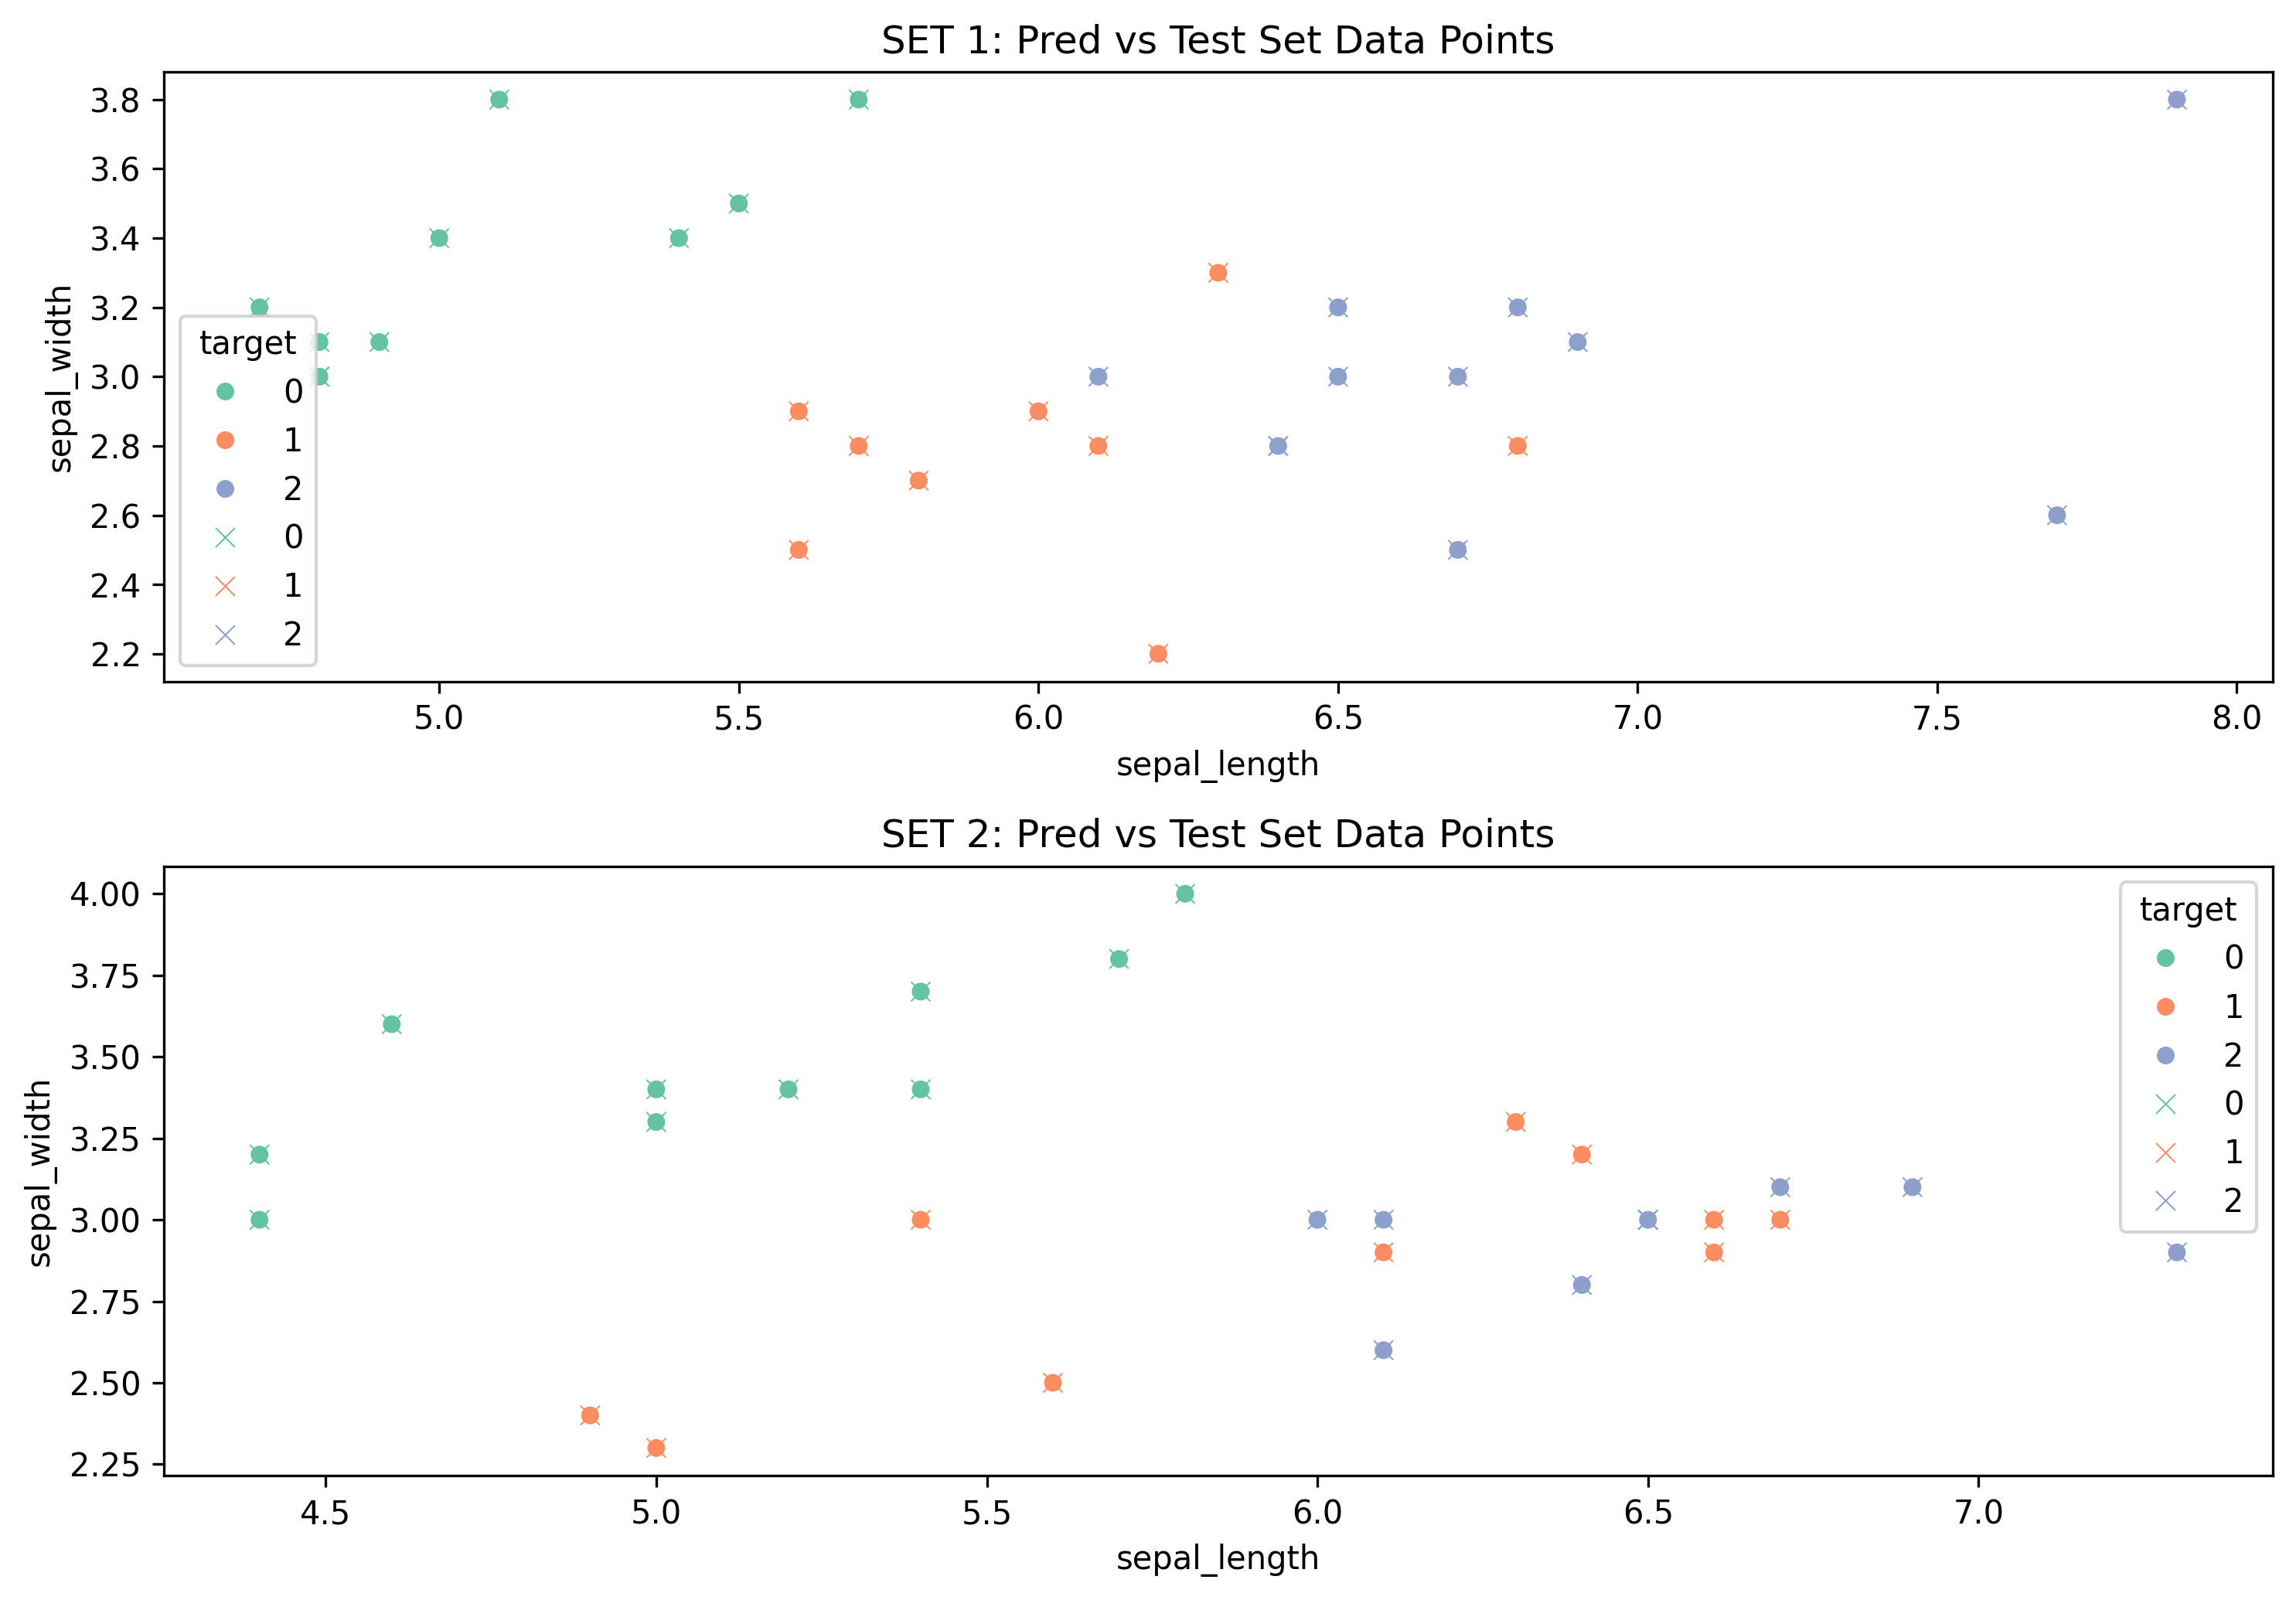

In [ ]:
#run the code here

# Visualize the data

fig, ax =plt.subplots(2,1,figsize=(10, 7),dpi=300)

# Plot the first set of training data and their corresponding test subset
sns.scatterplot(data=df_test, x='sepal_length', y='sepal_width',
                hue='target',palette="Set2", ax=ax[0])

sns.scatterplot(data=df_pred, x='sepal_length', y='sepal_width',
                hue='target', marker='x', palette="Set2", ax=ax[0])

ax[0].set_title('SET 1: Pred vs Test Set Data Points')

# Plot the second set of training data and their corresponding test subset
sns.scatterplot(data=df_test2, x='sepal_length', y='sepal_width',
                hue='target',palette="Set2", ax=ax[1])

sns.scatterplot(data=df_pred2, x='sepal_length', y='sepal_width',
                hue='target', marker='x', palette="Set2", ax=ax[1])

ax[1].set_title('SET 2: Pred vs Test Set Data Points')

# Call the figure
fig.tight_layout()
fig.show()

# Using sklearn for classifying

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#notice these declarations, take note how this affects our graphs
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
```

In [ ]:
#run the code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Notice these declarations, take note how this affects our graphs
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Wine dataset

```python
wine_df = pd.read_csv("winequality-red.csv")
wine_df.head()

wine_df.dtypes
```

In [ ]:
#run the code here

from pathlib import Path
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

datasets_folder = Path('/gdrive/MyDrive/datasets/')

wine_df = pd.read_csv(datasets_folder /'winequality-red.csv')
wine_df.head()

wine_df.dtypes

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**How many categories do we have?**

```python
print(f'The unique values of wine quality are as follows: {set(wine_df.quality)}')
print(f'There are : {len(set(wine_df.quality))} unique values of wine quality')
```

In [ ]:
#run code here

print(f'The unique values of wine quality are as follows: {set(wine_df.quality)}')
print(f'There are : {len(set(wine_df.quality))} unique values of wine quality')

The unique values of wine quality are as follows: {3, 4, 5, 6, 7, 8}
There are : 6 unique values of wine quality


## Exploratory Data Analysis

### Distribution of Wine Quality

```python
# Create pair plot with custom settings
sns.pairplot(data=wine_df, hue="quality", diag_kind="kde")

# Show plot
plt.show()
```

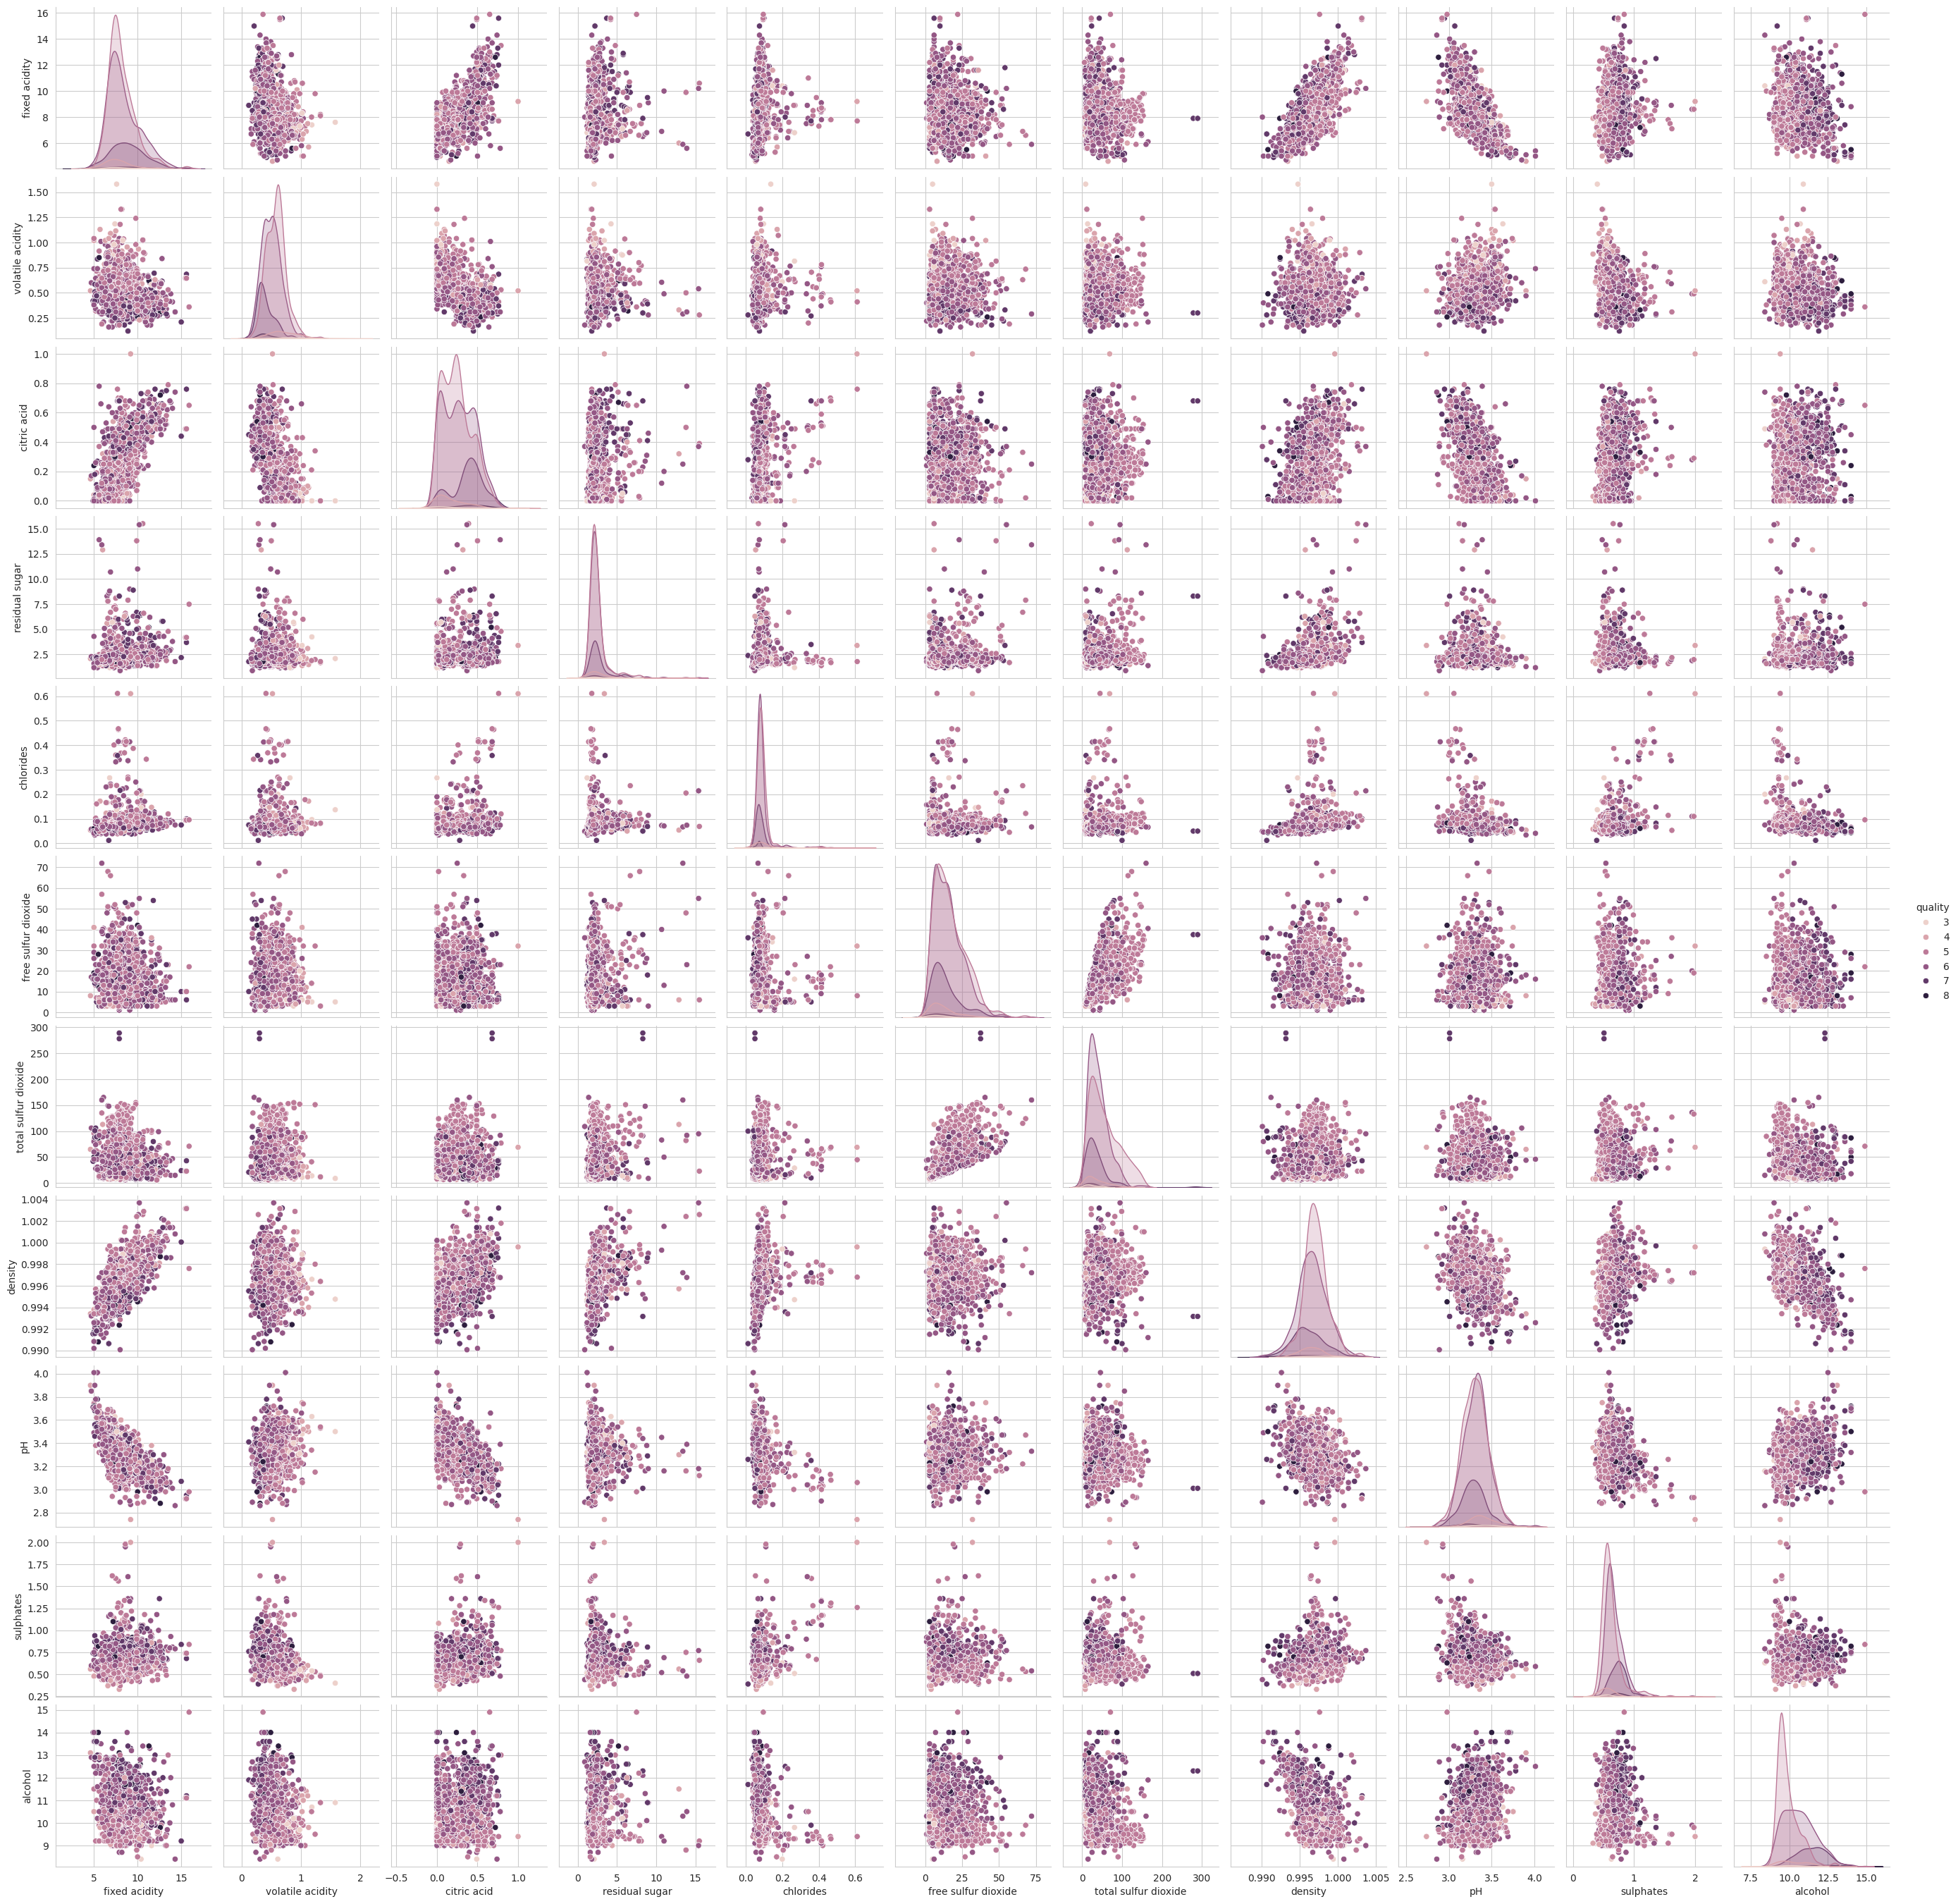

In [ ]:
#run code here

# Create pair plot with custom settings
sns.pairplot(data=wine_df, hue="quality", diag_kind="kde")

# Show plot
plt.show()

```python
#visualize the categorical distribution of the taregt variable
catplot_wine = sns.catplot(data=wine_df, x="quality",kind="count",color=dlsu_green)
catplot_wine.set(xlabel="Wine Quality", ylabel="Count")
catplot_wine.figure.suptitle("Distribution of Wine Quality");
```

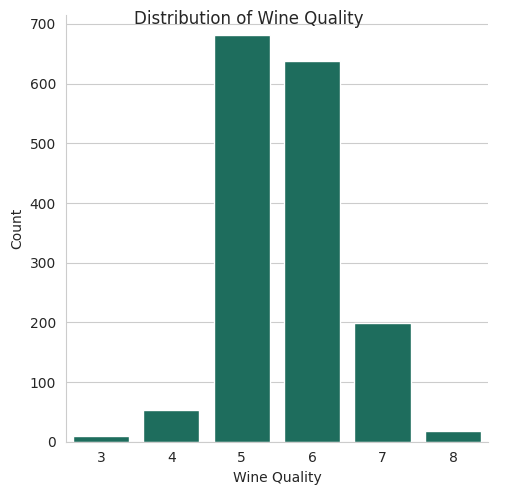

In [ ]:
#run code here

# Visualize the categorical distribution of the target variable
catplot_wine = sns.catplot(data=wine_df, x="quality",kind="count",color=dlsu_green)
catplot_wine.set(xlabel="Wine Quality", ylabel="Count")
catplot_wine.figure.suptitle("Distribution of Wine Quality");

### Correlation of Features
**Question 6**

What does high correlation signify? Discuss the underlying statistical concepts behind this.

<i>(Tip: Review your basic statsitics and read the documentation of the functions used)</i>

```python
# Calculate the correlation matrix
correlation_matrix = wine_df.corr()

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1,
            center = 0, annot=True, fmt=".2f",
            square=True, linewidths=.5)
plt.show()
```

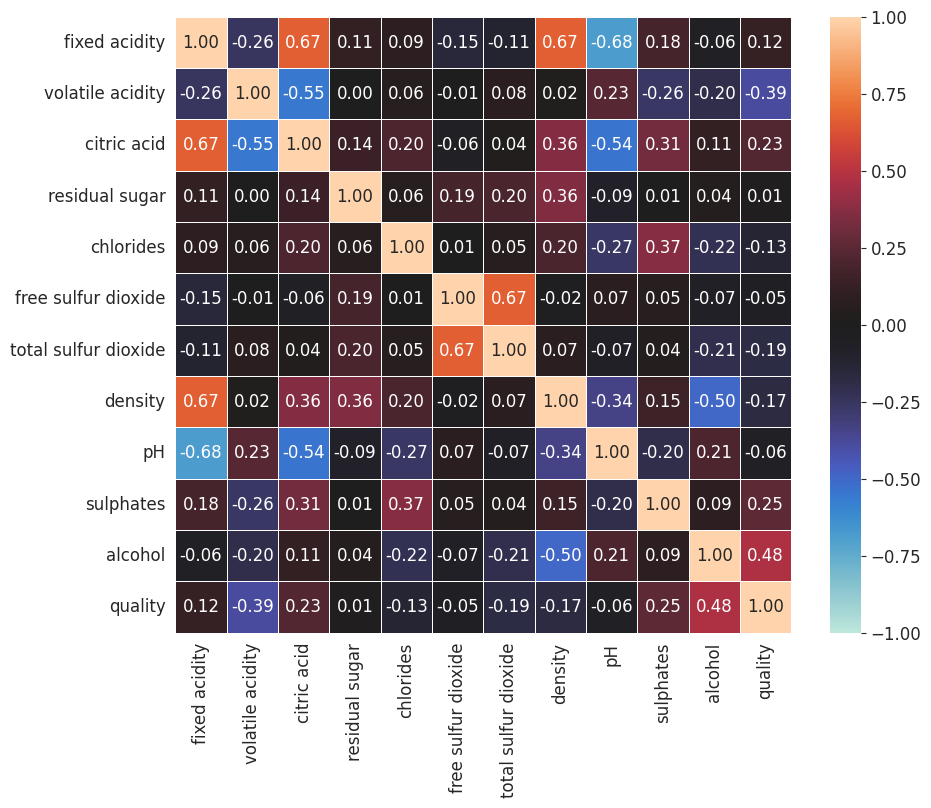

In [ ]:
#run code here

# Calculate the correlation matrix
correlation_matrix = wine_df.corr()

# Create an annotated heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1,
            center = 0, annot=True, fmt=".2f",
            square=True, linewidths=.5)
plt.show()

## Build the model
### Train - test the data

```python
wine_X = wine_df.loc[:, 'fixed acidity': 'alcohol']
wine_y = wine_df['quality']
wine_X.shape
```

In [ ]:
#run code here

wine_X = wine_df.loc[:, 'fixed acidity': 'alcohol']
wine_y = wine_df['quality']
wine_X.shape

(1599, 11)

```python
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

#build the validation set
X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_train_wine, y_train_wine, test_size=0.25, random_state=42)

print("Train",X_train_wine.shape)
print("Validation",X_val_wine.shape)
print("Test",X_test_wine.shape)
```

In [ ]:
#run code here

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_X, wine_y, test_size=0.2, random_state=42)

# Build the validation set
X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_train_wine, y_train_wine, test_size=0.25, random_state=42)

print("Train",X_train_wine.shape)
print("Validation",X_val_wine.shape)
print("Test",X_test_wine.shape)

Train (959, 11)
Validation (320, 11)
Test (320, 11)


### Create an Initial Model & Check for Accuracy

```python
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
clf.fit(X_train_wine, y_train_wine)
```

In [ ]:
#run code here

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3, p = 2)
clf.fit(X_train_wine, y_train_wine)

KNeighborsClassifier(n_neighbors=3)

```python
print("Accuracy for Train:", clf.score(X_train_wine, y_train_wine))
print("Accuracy for Validation:", clf.score(X_val_wine, y_val_wine))
print("Accuracy for Test:", clf.score(X_test_wine, y_test_wine))
```

In [ ]:
#run code here

print("Accuracy for Train:", clf.score(X_train_wine, y_train_wine))
print("Accuracy for Validation:", clf.score(X_val_wine, y_val_wine))
print("Accuracy for Test:", clf.score(X_test_wine, y_test_wine))

Accuracy for Train: 0.7226277372262774
Accuracy for Validation: 0.490625
Accuracy for Test: 0.4625


### Optimize the model

```python
res = []
for k in range(1,15):
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train_wine, y_train_wine)
    
    val_score = clf.score(X_val_wine, y_val_wine)
    test_score = clf.score(X_test_wine, y_test_wine)
    res.append([k, val_score, test_score])
res_df = pd.DataFrame(res, columns=["k", "val_score", "test_score"])
res_df
```

In [ ]:
#run code here

res = []
for k in range(1,15):
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train_wine, y_train_wine)

    val_score = clf.score(X_val_wine, y_val_wine)
    test_score = clf.score(X_test_wine, y_test_wine)
    res.append([k, val_score, test_score])
res_df = pd.DataFrame(res, columns=["k", "val_score", "test_score"])
res_df

k  val_score  test_score
0    1   0.559375    0.468750
1    2   0.543750    0.456250
2    3   0.490625    0.462500
3    4   0.559375    0.468750
4    5   0.540625    0.471875
5    6   0.534375    0.487500
6    7   0.546875    0.471875
7    8   0.540625    0.484375
8    9   0.531250    0.484375
9   10   0.546875    0.506250
10  11   0.531250    0.478125
11  12   0.537500    0.468750
12  13   0.512500    0.468750
13  14   0.528125    0.475000

```python
fig, ax = plt.subplots(figsize=(8, 4),dpi=100)
sns.lineplot(data=res_df,x='k',y='val_score', marker='o', label="Validation Score");
sns.lineplot(data=res_df,x='k',y='test_score', marker='o', label="Test Score");

plt.legend(loc='upper right')
```

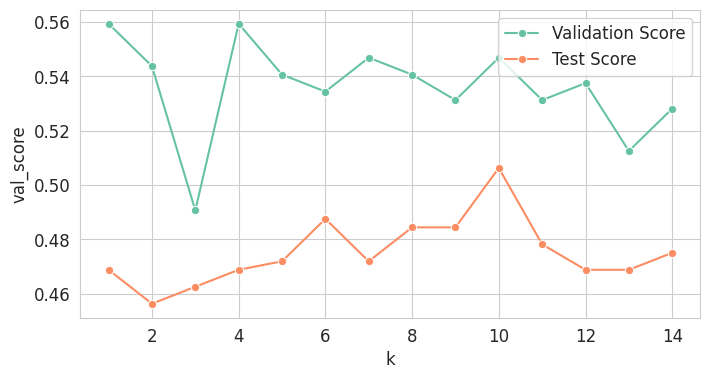

In [ ]:
#run code here

fig, ax = plt.subplots(figsize=(8, 4),dpi=100)
sns.lineplot(data=res_df,x='k',y='val_score', marker='o', label="Validation Score");
sns.lineplot(data=res_df,x='k',y='test_score', marker='o', label="Test Score");

plt.legend(loc='upper right')

### Look into the results

```python
clf = KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train_wine, y_train_wine)

y_pred_wine = clf.predict(X_test_wine)

predicted_df = pd.DataFrame()
predicted_df['y_test'] = y_test_wine
predicted_df['y_pred'] = y_pred_wine
predicted_df.head()
```

In [ ]:
#run code here

clf = KNeighborsClassifier(n_neighbors = 1, p = 2)
clf.fit(X_train_wine, y_train_wine)

y_pred_wine = clf.predict(X_test_wine)

predicted_df = pd.DataFrame()
predicted_df['y_test'] = y_test_wine
predicted_df['y_pred'] = y_pred_wine
predicted_df.head()

y_test  y_pred
803        6       5
124        5       5
350        6       6
682        5       6
1326       6       6

# Regression

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **California Housing Dataset**.

**California housing dataset.**

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References:

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.

Authors: Peter Prettenhofer
License: BSD 3 clause

And, as usual, we will also be splitting the dataset into train and test sets.

```python
X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")
```

In [ ]:
#run code here

X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (20640, 8), Output: (20640,)
Train Set Size | Input: (16512, 8), Output: (16512,)
Test Set Size | Input: (4128, 8), Output: (4128,)


```python
train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.fetch_california_housing()['feature_names'] + ['target']

df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target']

# test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
# df_test = pd.DataFrame(test_set, columns=columns)
# df_test['target'] = df_test['target'].astype(int)

df_train.head()
```

In [ ]:
#run code here

train_set = np.concatenate((X_train, y_train.reshape(-1,1)), axis=1)
columns = datasets.fetch_california_housing()['feature_names'] + ['target']

df_train = pd.DataFrame(train_set, columns=columns)
df_train['target'] = df_train['target']

# test_set = np.concatenate((X_test, y_test.reshape(-1,1)), axis=1)
# df_test = pd.DataFrame(test_set, columns=columns)
# df_test['target'] = df_test['target'].astype(int)

df_train.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
1  3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
2  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
3  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
4  3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

   Longitude  target  
0    -117.03   1.030  
1    -118.16   3.821  
2    -120.48   1.726  
3    -117.11   0.934  
4    -119.80   0.965

## Modeling
For reference, here's the formula for R-squared:

$$R^{2} (y,\hat{y}) = 1- \dfrac{\Sigma_i (y_i - \hat{y}_i)^2}{\Sigma_i (y_i - \bar{y})^2}$$

```python
def r_squared(y_true:np.array, y_pred:np.array) -> float:
    '''
    Returns the score using R-squared metric.
    '''
    y_mean = np.mean(y_true)
    
    ss_error_mean = ((y_true - y_mean)**2).sum()
    ss_error_reg  = ((y_true - y_pred)**2).sum()


    return 1 - (ss_error_reg/ss_error_mean)
```

In [ ]:
#run code here

def r_squared(y_true:np.array, y_pred:np.array) -> float:
    '''
    Returns the score using R-squared metric.
    '''
    y_mean = np.mean(y_true)

    ss_error_mean = ((y_true - y_mean)**2).sum()
    ss_error_reg  = ((y_true - y_pred)**2).sum()


    return 1 - (ss_error_reg/ss_error_mean)

```python
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1) # instantiate model
reg.fit(X_train, y_train) # train the model
score = reg.score(X_test, y_test) # does prediction and score evaluation in 1 line
print(f"Test Set Score: {score:.2%}")
```

In [ ]:
#run code here

from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=4, p=2, n_jobs=-1)
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)
print(f"Test Set Score: {score:.2%}")

Test Set Score: 13.41%


## Optimize Model by Testing out Different K Values

```python
res = []
for k in range(1,15):
    reg = KNeighborsRegressor(n_neighbors = k, p = 2)
    reg.fit(X_train, y_train)
    
    val_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    res.append([k, val_score, test_score])
res_df = pd.DataFrame(res, columns=["k", "train_score", "test_score"])
res_df
```

In [ ]:
#run code here

res = []
for k in range(1,15):
    reg = KNeighborsRegressor(n_neighbors = k, p = 2)
    reg.fit(X_train, y_train)

    val_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    res.append([k, val_score, test_score])
res_df = pd.DataFrame(res, columns=["k", "train_score", "test_score"])
res_df

k  train_score  test_score
0    1     1.000000   -0.181467
1    2     0.704873    0.036891
2    3     0.583678    0.107596
3    4     0.508243    0.134146
4    5     0.452925    0.146310
5    6     0.415003    0.155167
6    7     0.384984    0.157104
7    8     0.358701    0.157341
8    9     0.338367    0.158086
9   10     0.321629    0.155388
10  11     0.306539    0.153302
11  12     0.292668    0.151171
12  13     0.280892    0.150114
13  14     0.268450    0.146589

```python
fig, ax = plt.subplots(figsize=(8, 4),dpi=100)
sns.lineplot(data=res_df,x='k',y='train_score', marker='o', label="Train Score");
sns.lineplot(data=res_df,x='k',y='test_score', marker='o', label="Test Score");

plt.legend(loc='upper right');
```

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='k', ylabel='train_score'>)

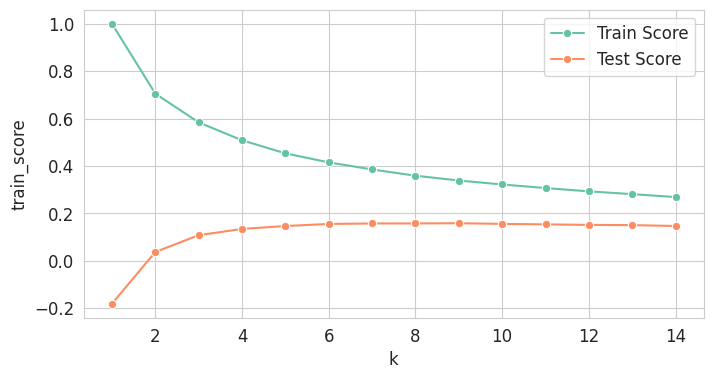

In [ ]:
#run code here

fig, ax = plt.subplots(figsize=(8, 4),dpi=100)
sns.lineplot(data=res_df,x='k',y='train_score', marker='o', label="Train Score");
sns.lineplot(data=res_df,x='k',y='test_score', marker='o', label="Test Score");

plt.legend(loc='upper right');

fig, ax

**Question 7**

How will you interpret this behavior of the accuracy scores? What is the optimal K, and why?
